# **Training a Regression Model**
---
> The purpose of the previous notebook; `02_Data_analysis.ipynb` was to explore the dataset and identify features that are predictive of the label, `rentals` in this case.

> The features identified are as follows:
+ `season`, `mnth`, `holiday`,`weekday`,`workingday`,`weathersit`,`temp`, `atemp`, `hum` `windspeed`

<style>
  .scrollable{
    max-height: 300px;
    max-width: 100%;
    overflow: auto;
  }
</style>

### Load the Data

In [1]:
# Import pandas
import pandas as pd
# Import matplotlib
import matplotlib.pyplot as plt
plt.style.use("fast")

# Load the data
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data.info()

--2024-06-01 10:19:56--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48800 (48K) [text/plain]
Saving to: ‘daily-bike-share.csv’

daily-bike-share.cs 100%[===================>]  47.66K  --.-KB/s    in 0.002s  

2024-06-01 10:19:56 (23.5 MB/s) - ‘daily-bike-share.csv’ saved [48800/48800]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int

### Separate _features_ and _label_
> Variable names like `X` and `y` are norms used in data science to represent **input / features** and **output / label** data respectively. This usage is based on the grounding in mathematical algorithms  
>> For example, formulas like:  
+ `y=mx+b`
+ `y = f([x1, x2...])`

In [2]:
# Saving the input / feature data in a variable
X = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']]

# Saving the output / label into a variable as well
y = bike_data["rentals"]

### Split the features and labels
> It's common practice in supervised learning to split the data into two subsets: a (typically larger) set with which to train the model, and a smaller _hold-back_ set with which to validate the trained model.  


> This allows us to evaluate how well the model performs when used with the validation dataset by comparing the predicted labels to the known labels.

> To **randomly** split the data, the [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function from the [`Scikit-Learn`](https://scikit-learn.org/stable/index.html) library is used.  

> **Common method call:**   
+ `train_test_split(*arrays, test_size=None, train_size=None, random_state=None)`  

> **Parameters**  
+ **arrayssequence of indexables with same length / shape[0]** - Allowed inputs are lists, numpy arrays, scipy-sparse matrices or pandas dataframes
+ **test_sizefloat or int, default=None** - If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split
+ **random_stateint, RandomState instance or None, default=None** - A random seed that will change the randomness of selecting the data  

> The code randomly splits the data into four groups:  
+ **X_train:** The feature values we'll use to train the model
+ **y_train:** The corresponding labels we'll use to train the model
+ **X_test:** The feature values we'll use to validate the model
+ **y_test:** The corresponding labels we'll use to validate the model


In [3]:
# Import sklearn.model_selection.train_test_split
from sklearn.model_selection import train_test_split

# Split the input and output into training and validation sets 70% - 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Fit the model
> The next step in the data science lifecycle is to fit the model to the training data. The act of "fitting" is basically how the model learns

> In this case, for a start, we'll start with a simple regression model - [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) _(an Ordinary Least Squares algorithm_) will be used to try and fit a straight line through data points.

> To fit the model, the [`fit(X, y)`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) method is called on on the machine learning model and the `X_train` and `y_train` data is passed.

In [4]:
# Import sklearn.linear_model.LinearRegression
from sklearn.linear_model import LinearRegression

# Fit the linear regression model
model = LinearRegression().fit(X_train, y_train)

### Test the model
> Now that we've trained the model, we can use it to predict `rentals` for the features we held back in our test dataset. Then we can compare these predictions to the actual label values to evaluate how well (or not!) the model is working.
+ Starting off, the `predict(X)` method is called on the model, and the `X_test` data passed to the function. The predicted values are then passed to evaluation metrics.

In [5]:
# Do prediction on feature test Data
y_pred = model.predict(X_test)

In [6]:
import numpy as np

# Print predicted label values against actual label values
print("Predicted Labels: ",np.round(y_pred, decimals=0)[:10])
print("Test labels: ", y_test.values[:10])

Predicted Labels:  [1896. 1184. 1007.  -28.  314.  385.  475.  590. 1476.  -22.]
Test labels:  [2418  754  222   47  244  145  240  555 3252   38]


#### Visualize
+ Visualize a scatter plot that compares the prediction to actual labels
+ Also, overlay a trend line.  
To do this, I chose [`scipy.stats.linregress()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html#scipy.stats.linregress) to calculate linear least-squares regression for `y_test` and `y_pred`

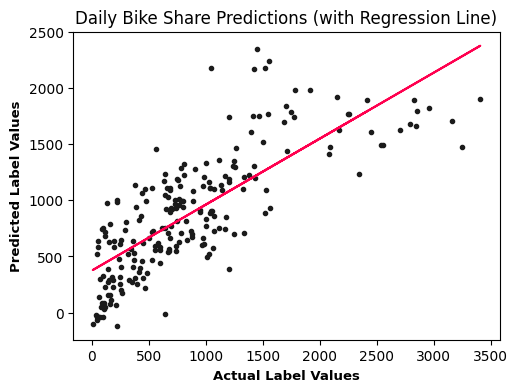

In [7]:
# import scipy linregress
from scipy.stats import linregress

result = linregress(y_test, y_pred)
# Recall the formula for a trend line is y = f(x) = mx + b, hence:
m = result.slope
b = result.intercept

fig, ax = plt.subplots(figsize=(5.5, 4))

# Scatter plot of Grade vs StudyHours
ax.scatter(x = y_test,
           y = y_pred,
           marker=".",
           color="#1b1b1b")

# Trend line: y = mx+b,  x = y_test
ax.plot(y_test, (m*y_test)+b,
        color = "#ff004f",
        linewidth=1.5)

# Customize the plot with matplotlib methods
ax.set_ylabel("Predicted Label Values", weight="black", fontsize=9.5)
ax.set_xlabel("Actual Label Values", weight="black", fontsize=9.5)
ax.set_title("Daily Bike Share Predictions (with Regression Line)")

plt.show()


#### Quantifying residuals
> Residuals can be calculated through a number of commonly used evaluation metrics, such as:
+ **Mean Square Error (MSE)** - [`sklearn.metrics.mean_squared_error(y_true, y_pred)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)
+ **Root Mean Square Error (RMSE)** - `nq.sqrt(mse)`
+ **R-squared** - [`sklearn.metrics.r2_score(y_true, y_pred)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score)
+ **Score** - [`score(X_test, y_test)`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score)

In [8]:
# Import necessary regression metrics from sklearn
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Mean Square Error
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {round(mse, 2)}")

# RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {round(rmse, 2)}")

# Rsquared
r2 = r2_score(y_test, y_pred)
print(f"R2: {round(r2, 2)}")

# Score
scr = model.score(X_test, y_test)
print(f"Model Score: {round(scr, 2)}")

MSE: 201972.56
RMSE: 449.41
R2: 0.6
Model Score: 0.6


### Up next
> Exploring other regression algorithms to improve performance.